In [139]:
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
import plotly.express as px
import numpy as np

In [140]:
df = pd.read_csv('homeprices_m.csv')

df

,area,bedrooms,age,price,loc
0,2600,3,20,550000,Cantonment
1,3000,4,15,565000,Mohammadpur
2,3200,2,18,610000,Dhanmondi
3,3600,3,30,595000,Uttara
4,4000,5,8,760000,Banani
5,4100,6,8,810000,Gulshan


In [141]:
x = df['area']
y = df['price']

LINE PLOT 

matplotlib

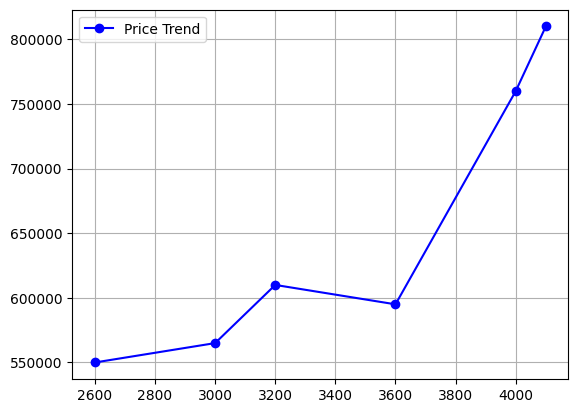

In [142]:
plt.plot(x,y, marker='o', label = 'Price Trend', color='b')

plt.legend()
plt.grid()
plt.show()

Seaborn

<Axes: xlabel='area', ylabel='price'>

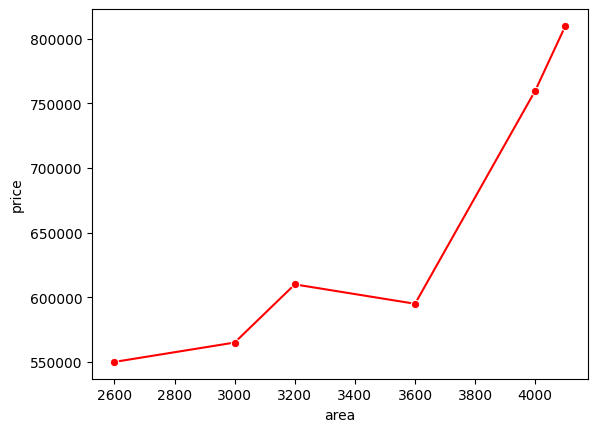

In [143]:
sns.lineplot(data=df, x = x, y = y, marker="o", color="r")

In [192]:
fig = px.line(df, x=x, y=y,  markers=True, title="House Price Trend")
# fig.update_traces(mode='markers') # remove the line
fig.update_layout(
    plot_bgcolor="rgba(0, 0, 0, 0)",  # Transparent plot background
    paper_bgcolor="rgba(0, 0, 0, 0)",  # Transparent paper background
    font=dict(color="white"),  # White font color for visibility
)
fig.show()

SCATTER

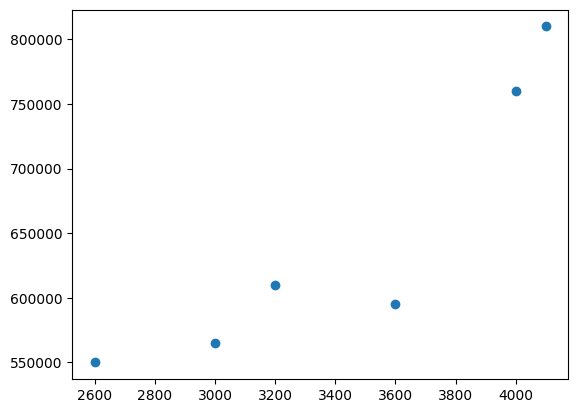

In [145]:
plt.scatter(x,y)

<Axes: xlabel='area', ylabel='price'>

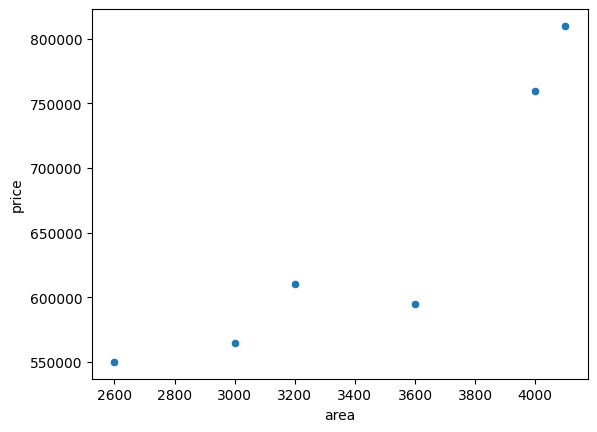

In [146]:
sns.scatterplot(data= df, x=x, y=y)

In [186]:
px.scatter(df, x=x,y=y,color="area")

BARPLOT

In [148]:
avg_price_loc = df.groupby('loc')['price'].mean()
avg_price_loc.index

Index(['Banani', 'Cantonment', 'Dhanmondi', 'Gulshan', 'Mohammadpur',
       'Uttara'],
      dtype='object', name='loc')

In [149]:
avg_price_loc.values

array([760000., 550000., 610000., 810000., 565000., 595000.])

In [150]:
avg_price_loc

loc
Banani         760000.0
Cantonment     550000.0
Dhanmondi      610000.0
Gulshan        810000.0
Mohammadpur    565000.0
Uttara         595000.0
Name: price, dtype: float64

<BarContainer object of 6 artists>

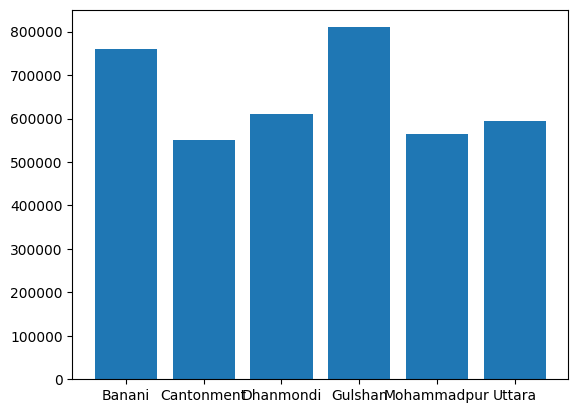

In [151]:
plt.bar(avg_price_loc.index,avg_price_loc.values)

<Axes: xlabel='loc', ylabel='price'>

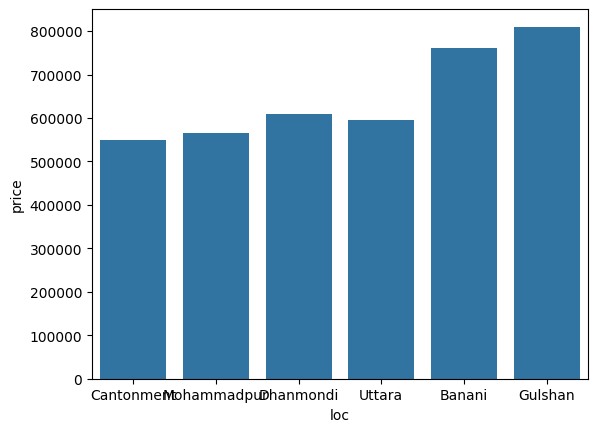

In [152]:
sns.barplot(x='loc', y='price', data=df, estimator=np.mean)

In [153]:
px.bar(df,x='loc',y='price',color="loc",labels={"price": "Average Price ($)"})

FUNNEL

In [154]:
px.funnel(df, x='price', y='loc',title="Funnel Plot - Home Prices by Location", color='price')

pie

In [155]:
loc_counts = df['loc'].value_counts()
loc_counts

loc
Cantonment     1
Mohammadpur    1
Dhanmondi      1
Uttara         1
Banani         1
Gulshan        1
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x28ba71482d0>,
 [Text(0.9526279361491276, 0.5500000138802306, 'Cantonment'),
  Text(-4.8082529002048655e-08, 1.099999999999999, 'Mohammadpur'),
  Text(-0.9526280497967484, 0.5499998170367368, 'Dhanmondi'),
  Text(-0.9526276913711704, -0.5500004378478569, 'Uttara'),
  Text(1.311736850028664e-08, -1.0999999999999999, 'Banani'),
  Text(0.9526280978792578, -0.5499997337553423, 'Gulshan')],
 [Text(0.5196152378995241, 0.3000000075710348, '16.7%'),
  Text(-2.6226834001117445e-08, 0.5999999999999994, '16.7%'),
  Text(-0.5196152998891355, 0.2999999002018564, '16.7%'),
  Text(-0.5196151043842747, -0.30000023882610377, '16.7%'),
  Text(7.1549282728836204e-09, -0.5999999999999999, '16.7%'),
  Text(0.5196153261159587, -0.29999985477564123, '16.7%')])

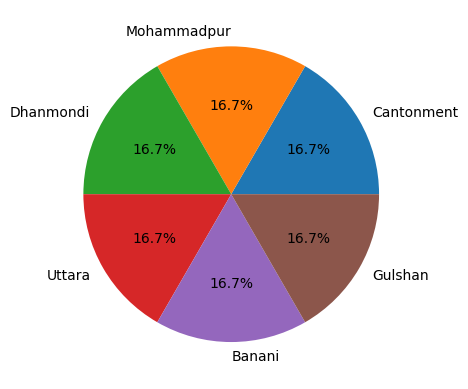

In [156]:
plt.pie(loc_counts, labels=loc_counts.index, autopct='%1.1f%%')

In [157]:
fig = px.pie(df, names='loc', hole=0.2)
fig.update_layout(
    plot_bgcolor="rgba(0, 0, 0, 0)",  # Transparent plot background
    paper_bgcolor="rgba(0, 0, 0, 0)",  # Transparent paper background
    font=dict(color="white"),  # White font color for visibility
)
fig.show()

(array([1., 0., 1., 0., 1., 0., 1., 0., 0., 2.]),
 array([2600., 2750., 2900., 3050., 3200., 3350., 3500., 3650., 3800.,
        3950., 4100.]),
 <BarContainer object of 10 artists>)

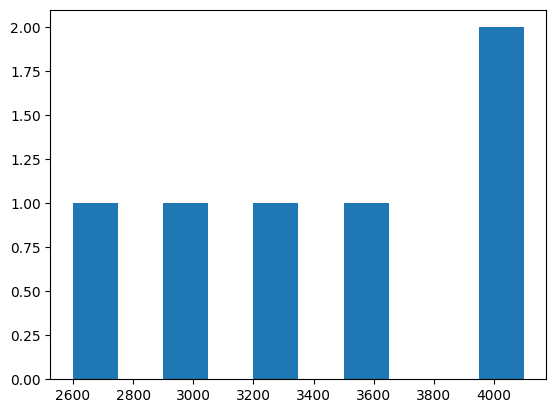

In [158]:
plt.hist(x, bins=10)

<Axes: xlabel='area', ylabel='Count'>

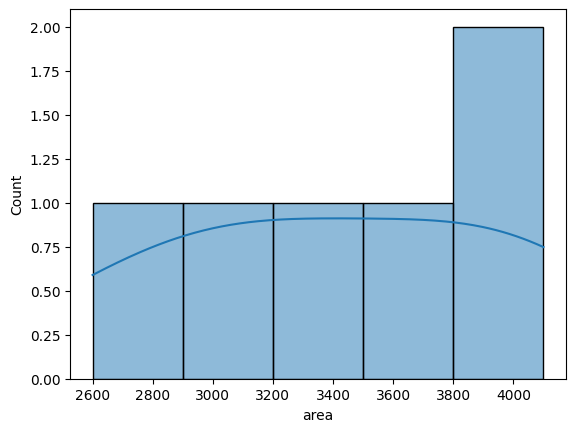

In [159]:
sns.histplot(x,bins=5, kde=True)

In [160]:
px.histogram(df, x=x, nbins=5,color=x)

HEATMAP

In [161]:
from sklearn.preprocessing import LabelEncoder

df['loc_encoded'] = LabelEncoder().fit_transform(df['loc'])

In [162]:
df

,area,bedrooms,age,price,loc,loc_encoded
0,2600,3,20,550000,Cantonment,1
1,3000,4,15,565000,Mohammadpur,4
2,3200,2,18,610000,Dhanmondi,2
3,3600,3,30,595000,Uttara,5
4,4000,5,8,760000,Banani,0
5,4100,6,8,810000,Gulshan,3


<Axes: >

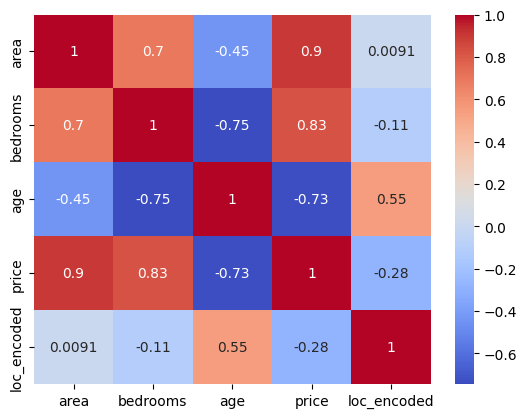

In [163]:

sns.heatmap(df.drop(['-7'],axis=1).corr(), annot=True, cmap='coolwarm')

In [171]:
# Drop non-numeric columns
df_numeric = df.select_dtypes(include=["number"])

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Plotly Heatmap with Only Numeric Columns
fig = px.imshow(corr_matrix, text_auto=True, title="Plotly Heatmap - Correlation Matrix")

# Show plot
fig.show()


Pair

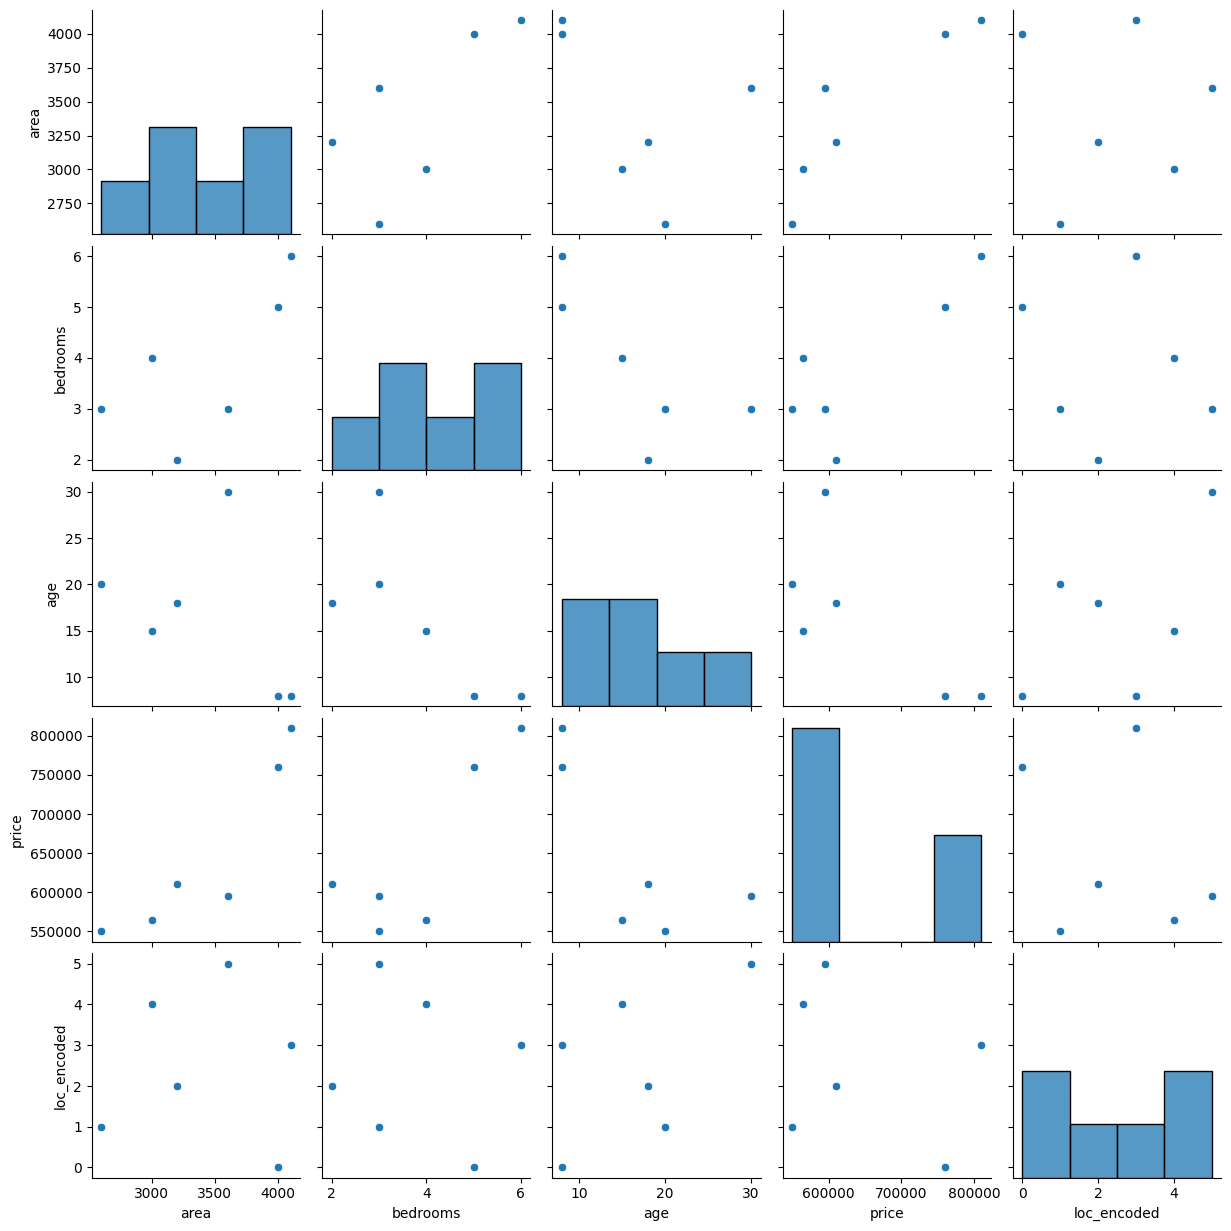

In [180]:
sns.pairplot(df_numeric, height=2.5)

In [185]:
# Plotly Pair Plot (Scatter Matrix)
fig = px.scatter_matrix(df_numeric, dimensions=["area", "bedrooms", "age", "price"])

# Show plot
fig.show()